In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

### 1. Explore Data

In [116]:
df = pd.read_csv("spam.csv", encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [117]:
df.shape

(5572, 5)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [119]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [120]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [121]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [123]:
df['length_text'] = df['text'].apply(len)
df.head()

,label,text,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


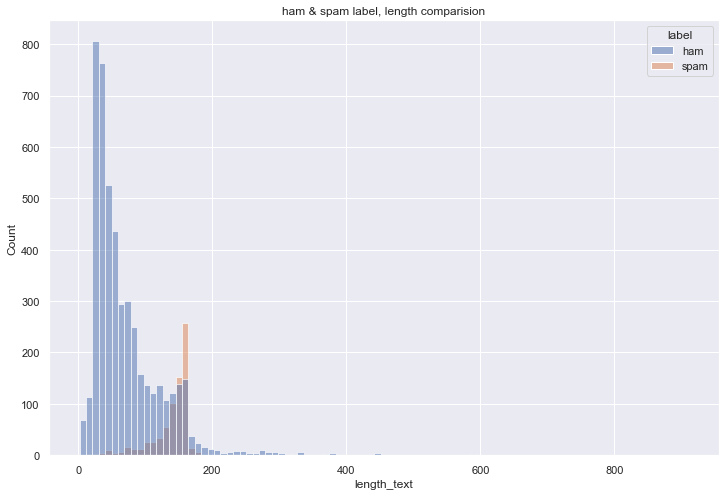

In [124]:
# Plot correlation between length and label
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['length_text'],
    hue = df['label']
)
plt.title("ham & spam label, length comparision")
plt.show()

In [125]:
df[df['label'] == 'ham']['length_text'].describe()

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: length_text, dtype: float64

In [126]:
df[df['label'] == 'spam']['length_text'].describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: length_text, dtype: float64

In [127]:
label_check = np.unique(df['label'], return_counts=True)
label_check

(array(['ham', 'spam'], dtype=object), array([4825,  747], dtype=int64))

In [128]:
label_count = {str(label_check[0][0]): label_check[1][0], str(label_check[0][1]): label_check[1][1]}
label_count

{'ham': 4825, 'spam': 747}

In [129]:
print('ham contain {:.2f}% of all'.format(label_count['ham'] / sum(label_count.values()) * 100))
print('spam contain {:.2f}% of all'.format(label_count['spam'] / sum(label_count.values()) * 100))

ham contain 86.59% of all
spam contain 13.41% of all


We can see, it's very different between percent of ham and spam.
So i will balance it now.

In [130]:
#compute the length of majority & minority class
minority_length = len(df[df['label'] == "spam"])
majority_length = len(df[df['label'] == "ham"])

#store the indices of majority and minority class
minority_indices = df[df['label'] == "spam"].index
majority_indices = df[df['label'] == "ham"].index
print("- minority_indices: " + str(minority_indices))
print("- majority_indices: " + str(majority_indices))

- minority_indices: Int64Index([   2,    5,    8,    9,   11,   12,   15,   19,   34,   42,
            ...
            5492, 5497, 5501, 5524, 5526, 5537, 5540, 5547, 5566, 5567],
           dtype='int64', length=747)
- majority_indices: Int64Index([   0,    1,    3,    4,    6,    7,   10,   13,   14,   16,
            ...
            5560, 5561, 5562, 5563, 5564, 5565, 5568, 5569, 5570, 5571],
           dtype='int64', length=4825)


In [131]:
# generate new majority indices from total majority_indices
# We want obtain equivalent number of indices length, so i will use size equal to minority class length
random_majority_indices = np.random.choice(
    majority_indices,
    size=minority_length,
    replace=False
)

# Test output
[x in majority_indices for x in random_majority_indices[:10]]


[True, True, True, True, True, True, True, True, True, True]

In [132]:
samples_indices = np.concatenate([minority_indices, random_majority_indices])
samples_indices

array([   2,    5,    8, ..., 1067, 3291, 4055], dtype=int64)

In [133]:
#create df using new indices
df = df.loc[samples_indices]
df

,label,text,length_text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
420,ham,Yes:)from last week itself i'm taking live call.,48
4002,ham,somewhere out there beneath the pale moon ligh...,144
1067,ham,Meeting u is my work. . . Tel me when shall i ...,65
3291,ham,Dear good morning how you feeling dear,38


In [134]:
df.shape

(1494, 3)

In [135]:
#shuffle the sample
df=df.sample(frac=1)
df.head()

,label,text,length_text
683,spam,Hi I'm sue. I am 20 years old and work as a la...,158
4591,ham,Right it wasnt you who phoned it was someone w...,70
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40...",146
5214,spam,Natalja (25/F) is inviting you to be her frien...,136
2926,ham,Ok... U enjoy ur shows...,25


In [136]:
#reset the index as its all mixed
df=df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.head()

,label,text,length_text
0,spam,Hi I'm sue. I am 20 years old and work as a la...,158
1,ham,Right it wasnt you who phoned it was someone w...,70
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",146
3,spam,Natalja (25/F) is inviting you to be her frien...,136
4,ham,Ok... U enjoy ur shows...,25


In [137]:
np.unique(df['label'], return_counts=True)

(array(['ham', 'spam'], dtype=object), array([747, 747], dtype=int64))

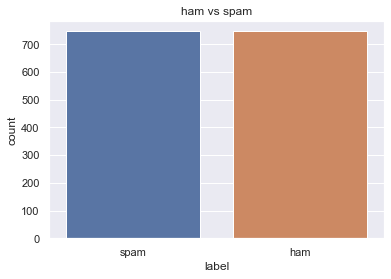

In [138]:
sns.countplot(
    data=df,
    x='label'
)
plt.title('ham vs spam')
plt.show()

### 2. Feature Extractions

- #### First, i have number of character in 'length_text'
- #### Now, let's check how many words in each text?

In [139]:
df['word_count'] = df['text'].apply(lambda x: len(x.split(" ")))
df.head(5)

,label,text,length_text,word_count
0,spam,Hi I'm sue. I am 20 years old and work as a la...,158,35
1,ham,Right it wasnt you who phoned it was someone w...,70,14
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",146,25
3,spam,Natalja (25/F) is inviting you to be her frien...,136,22
4,ham,Ok... U enjoy ur shows...,25,5


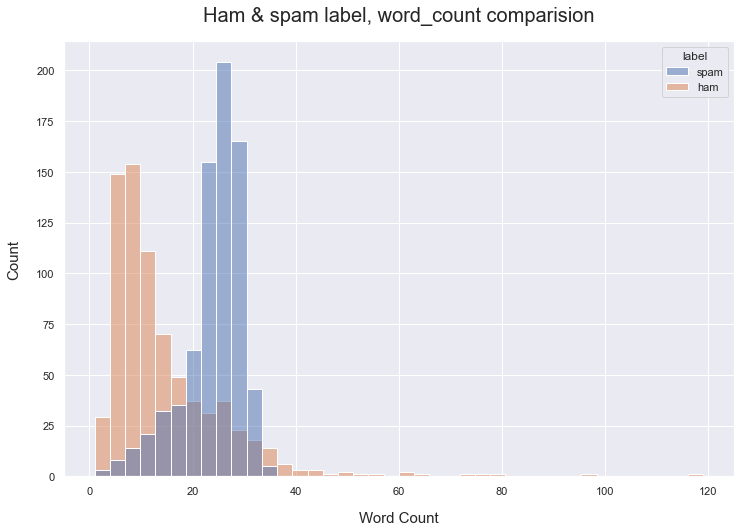

In [140]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['word_count'],
    hue = df['label']
)
plt.xlabel('Word Count', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, word_count comparision", pad=20, fontsize=20)
plt.show()

- #### Average word length can also potentially help me in improving my model

In [141]:
def avg_word_len(text):
    words = text.split(" ")
    return (sum(len(word) for word in words) / len(words))

In [142]:
df['avg_word_len'] = df['text'].apply(lambda x:avg_word_len(x))
df.head()

,label,text,length_text,word_count,avg_word_len
0,spam,Hi I'm sue. I am 20 years old and work as a la...,158,35,3.542857
1,ham,Right it wasnt you who phoned it was someone w...,70,14,4.071429
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",146,25,4.880000
3,spam,Natalja (25/F) is inviting you to be her frien...,136,22,5.227273
4,ham,Ok... U enjoy ur shows...,25,5,4.200000


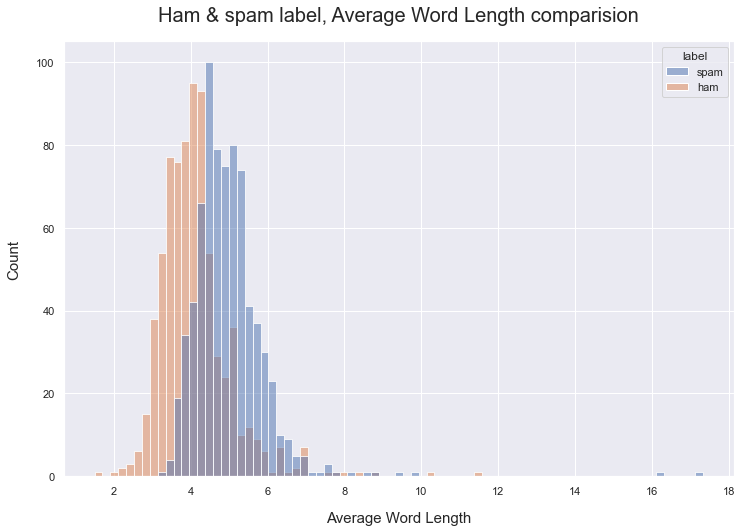

In [143]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['avg_word_len'],
    hue = df['label']
)
plt.xlabel('Average Word Length', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, Average Word Length comparision", pad=20, fontsize=20)
plt.show()

- #### Number of stop_words
While solving NLP problems, we usually remove stop_word first. But sometimes, calculating the number of stopword can give us some extra information which we might remove before.

In [144]:
from nltk.corpus import stopwords
stop_w = stopwords.words('English')
df['num_stop_w'] = df['text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))
df.head()

,label,text,length_text,word_count,avg_word_len,num_stop_w
0,spam,Hi I'm sue. I am 20 years old and work as a la...,158,35,3.542857,8
1,ham,Right it wasnt you who phoned it was someone w...,70,14,4.071429,7
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",146,25,4.880000,6
3,spam,Natalja (25/F) is inviting you to be her frien...,136,22,5.227273,7
4,ham,Ok... U enjoy ur shows...,25,5,4.200000,0


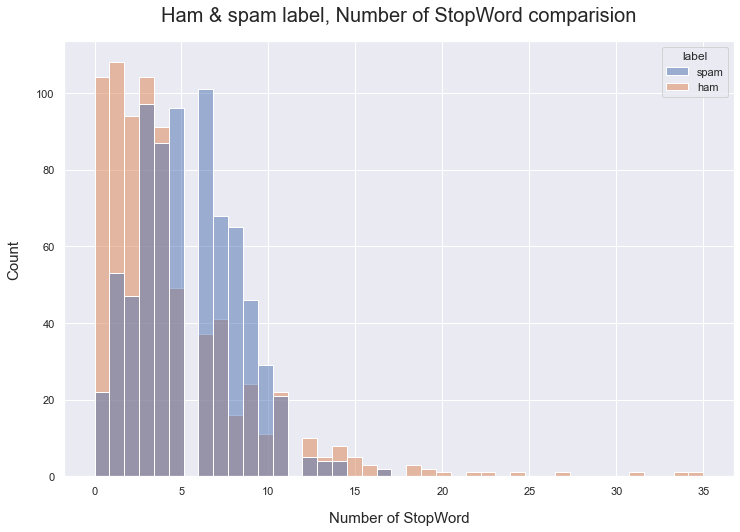

In [145]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['num_stop_w'],
    hue = df['label']
)
plt.xlabel('Number of StopWord', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, Number of StopWord comparision", pad=20, fontsize=20)
plt.show()

- #### Number of special character.
It seem more special character, it will be spam. Let's check this condition.

In [146]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [147]:
df['num_special_char'] = df['text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
df[['label', 'text', 'num_special_char']].head()

,label,text,num_special_char
0,spam,Hi I'm sue. I am 20 years old and work as a la...,9
1,ham,Right it wasnt you who phoned it was someone w...,1
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",6
3,spam,Natalja (25/F) is inviting you to be her frien...,12
4,ham,Ok... U enjoy ur shows...,6


- #### Number of numerics
- ##### It's also useful feature.
+ depending on each problem, we can choose just count number of numerics like 1, 2, 34859 ... 
+ or count every word constain number in itself like 1, 2, 3rd, 4years, 3hf323, 8fs9df, $100 ...
- In this case, i choose count every word constain number like a features.

In [148]:
df['contains_num'] = df['text'].apply(lambda x: len([word for word in x if any(map(str.isdigit, word))]))
df[['label', 'text', 'contains_num']].head()

,label,text,contains_num
0,spam,Hi I'm sue. I am 20 years old and work as a la...,14
1,ham,Right it wasnt you who phoned it was someone w...,0
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",18
3,spam,Natalja (25/F) is inviting you to be her frien...,21
4,ham,Ok... U enjoy ur shows...,0


- #### Number of UPCASEWORD

In [149]:
df['num_upcase'] = df['text'].apply(lambda x: len([word for word in x.split(" ") if word.isupper()]))
df[['label', 'text', 'num_upcase']].head()

,label,text,num_upcase
0,spam,Hi I'm sue. I am 20 years old and work as a la...,5
1,ham,Right it wasnt you who phoned it was someone w...,0
2,spam,"ou are guaranteed the latest Nokia Phone, a 40...",3
3,spam,Natalja (25/F) is inviting you to be her frien...,6
4,ham,Ok... U enjoy ur shows...,1


### 3.Pre-processcing

In [150]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader import wordnet

In [151]:
def tag(t):
    if t.startswith("N"):
        return wordnet.NOUN
    elif t.startswith("V"):
        return wordnet.VERB
    elif t.startswith("R"):
        return wordnet.ADV
    elif t.startswith("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [152]:
def remove_num(text, num_only=False):
    if not num_only:
        # just remove number like 1, 123123, 55325794, ...
        token = [w for w in text if not w.isdigit()]
    else:
        # remove all word which contains num like 1, 213, as89, 12th, 3rd ...
        token = [w for w in text if not any(map(str.isdigit, w))]
    return ' '.join(token)

In [153]:
def clean_text(text, num_only=False):
    """
    First of all, remove special character.
    It doesn't any extra functions. So remove it help reduce size of data
    string.punctuation contains all special character like @ $ # * & ...
    # Another solutions:
        df['text'].str.replace('[\w\s]', '')
    """
    translators = str.maketrans("", "", string.punctuation)
    text = text.translate(translators)
    
    """
    Next, i will lowercase character and remove number.
    If we don't lowercase, when count word, Basic and basic are 2 different word
    This avoid mutiplies copy in same word.
    """
    words = word_tokenize(text.lower())
    tokens = word_tokenize(remove_num(words, False))
    
    """
    Then, remove stop word and word that length <= 1
    Because, word has length <= 1 usually dont have meaning
    """
    tokens = [w for w in tokens if w not in stop_w and len(w) > 1]
    
    return " ".join(tokens)

In [154]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,Hi I'm sue. I am 20 years old and work as a la...,hi im sue years old work lapdancer love sex te...
1,Right it wasnt you who phoned it was someone w...,right wasnt phoned someone number like
2,"ou are guaranteed the latest Nokia Phone, a 40...",ou guaranteed latest nokia phone 40gb ipod mp3...
3,Natalja (25/F) is inviting you to be her frien...,natalja 25f inviting friend reply yes440 no440...
4,Ok... U enjoy ur shows...,ok enjoy ur shows


- #### Common word removal

In [158]:
freq_word = pd.Series(' '.join(df['clean_text']).split(" ")).value_counts()[:10]
freq_word

call      380
free      228
ur        179
txt       153
text      133
get       127
mobile    126
stop      118
claim     113
reply     110
dtype: int64

In [159]:
freq = list(freq_word.index)
freq

['call',
 'free',
 'ur',
 'txt',
 'text',
 'get',
 'mobile',
 'stop',
 'claim',
 'reply']

In [160]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split(" ") if x not in freq_word]))
df[['text', 'clean_text']].head()

,text,clean_text
0,Hi I'm sue. I am 20 years old and work as a la...,hi im sue years old work lapdancer love sex te...
1,Right it wasnt you who phoned it was someone w...,right wasnt phoned someone number like
2,"ou are guaranteed the latest Nokia Phone, a 40...",ou guaranteed latest nokia phone 40gb ipod mp3...
3,Natalja (25/F) is inviting you to be her frien...,natalja 25f inviting friend reply yes440 no440...
4,Ok... U enjoy ur shows...,ok enjoy ur shows


- #### Rarely word removal
- It's so rarely. The association between them and other word is dominated by noise.
- You can replace rare words with a more general form and then this will have higher counts

In [161]:
rarely_word = pd.Series(' '.join(df['clean_text']).split(" ")).value_counts()[-10:]
rarely_word

drivin       1
qlynnbv      1
padhegm      1
bû÷ham      1
recession    1
carlie       1
triumphed    1
benefits     1
mrng         1
credited     1
dtype: int64

In [162]:
freq = list(rarely_word.index)
freq

['drivin',
 'qlynnbv',
 'padhegm',
 'b\x89û÷ham',
 'recession',
 'carlie',
 'triumphed',
 'benefits',
 'mrng',
 'credited']

In [164]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split(" ") if w not in freq]))
df[['text', 'clean_text']].head()

,text,clean_text
0,Hi I'm sue. I am 20 years old and work as a la...,hi im sue years old work lapdancer love sex te...
1,Right it wasnt you who phoned it was someone w...,right wasnt phoned someone number like
2,"ou are guaranteed the latest Nokia Phone, a 40...",ou guaranteed latest nokia phone 40gb ipod mp3...
3,Natalja (25/F) is inviting you to be her frien...,natalja 25f inviting friend reply yes440 no440...
4,Ok... U enjoy ur shows...,ok enjoy ur shows


- #### Spelling correction.
We should replace mistake spelling order to reduce multiples of copies word. Like (u, you) ...

In [165]:
from textblob import TextBlob

In [166]:
df['spelling_correction'] = df['clean_text'].apply(lambda x: str(TextBlob(x).correct()))
df[['text', 'clean_text', 'spelling_correction']].head()

,text,clean_text,spelling_correction
0,Hi I'm sue. I am 20 years old and work as a la...,hi im sue years old work lapdancer love sex te...,hi in sue years old work lapdancer love sex te...
1,Right it wasnt you who phoned it was someone w...,right wasnt phoned someone number like,right want phone someone number like
2,"ou are guaranteed the latest Nokia Phone, a 40...",ou guaranteed latest nokia phone 40gb ipod mp3...,ou guaranteed latest nikita phone 40gb upon ma...
3,Natalja (25/F) is inviting you to be her frien...,natalja 25f inviting friend reply yes440 no440...,natalya of inviting friend reply yes440 no440 ...
4,Ok... U enjoy ur shows...,ok enjoy ur shows,ok enjoy or shows


- #### Lemmatization
Convert the word into the root word
Exp: Did-> do, are-> be, years-> year, went-> go, talked -> talk ...

In [168]:
def lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(w, pos=tag(wn)) for w, wn in tokens]
    
    return " ".join(tokens)

In [169]:
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize(x))
df['spelling_correction'] = df['spelling_correction'].apply(lambda x: lemmatize(x))
df[['text', 'clean_text', 'spelling_correction']].head()

,text,clean_text,spelling_correction
0,Hi I'm sue. I am 20 years old and work as a la...,hi im sue year old work lapdancer love sex tex...,hi in sue year old work lapdancer love sex tex...
1,Right it wasnt you who phoned it was someone w...,right wasnt phone someone number like,right want phone someone number like
2,"ou are guaranteed the latest Nokia Phone, a 40...",ou guarantee late nokia phone 40gb ipod mp3 pl...,ou guarantee late nikita phone 40gb upon may p...
3,Natalja (25/F) is inviting you to be her frien...,natalja 25f invite friend reply yes440 no440 s...,natalya of invite friend reply yes440 no440 se...
4,Ok... U enjoy ur shows...,ok enjoy ur show,ok enjoy or show
